    Nama  : TIA HERMITA
    NIM   : 09011281722051
    KELAS : SK Reg 5A
    MK    : KECERDASAN BUATAN (AI)

# Prototipe Otomatis Pengendalian Kadar Air Berbasis Logika Fuzzy

        Pada pembuatan sistem ini, input fuzzy terdiri dari dua variabel, yaitu berupa data Kelembaban Tanah dan Intensitas Cahaya. Sedangkan untuk output fuzzy yaitu berupa penyiraman dengan aktuator (pompa).
        Untuk variabel input Kelembaban Tanah, memiliki tiga kriteria fuzzy yaitu Kering, Lembab, dan Basah.
        Lalu untuk variabel input Intensitas Cahaya juga memiliki tiga kriteria fuzzy yaitu Gelap, Redup, dan Terang.
        Untuk variabel output memiliki dua kriteria yaitu On dan Off, dimana aktuator pompa akan berada dalam keadaan Off apabila Kelembaban Tanah dalam kondisi basah dan Intensitas Cahaya redup atau gelap.

# Input  :
kelembaban tanah terbagi menjadi 3 bagian yakni:
- Kering (1 - 40 RH)
- Lembab (30 - 80 RH)
- Basah (70 - 120 RH)

intensitas cahaya terbagi menjadi 3 bagian yakni:
- Gelap (1 - 40 Lux)
- Redup (30 - 80 Lux)
- Terang (70 - 120 Lux)

# Output :
pompa aktuator terbagi menjadi 2 kondisi yakni:
- Off (1 - 5)
- On (3 - 7)

In [2]:
# memanggil library yang akan digunakan
# skfuzzy merupakan library fuzzy logic pada python yang bekerja dalam numpy array

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Fuzzifikasi

- Menentukan variabel dan semesta pembicaraan, dimana setiap variabel input dan output akan ditentukan batas nilai dari masing-masing variabel.

In [3]:
# Input
Kelembaban = ctrl.Antecedent(np.arange(0,120,1), 'Kelembaban tanah') #variabel kelembaban tanah dengan nilai 0 sampai 70 dengan range 1
Cahaya = ctrl.Antecedent(np.arange(0,120,1), 'Intensitas cahaya') #variabel intensitas cahaya dengan nilai 0 sampai 115 dengan range 1

# Output
Pompa = ctrl.Consequent(np.arange(1,7.1,1), 'Status pompa')

# Plotting
Kelembaban1 = np.arange(0,120,1) #untuk plotting saja
Cahaya1 = np.arange(0,120,1) #untuk plotting saja
Pompa1 = np.arange(1,7,1) #untuk plotting saja

- # Fuzzifikasi Kelembaban

Untuk kelembaban tanah, fungsi keanggotaan terbagi menjadi 3 bagian, yaitu:
$$ Kering = 1 - 55 RH $$
$$ Lembab = 30 - 80 RH $$
$$ Basah = 55 - 120 RH $$


Fungsi keanggotaan kelembaban tanah


$ \mu Kering [x] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 55 \\
       {55-x \over 55-20} & \mbox{; } 20 < x < 55 \\
       1 & \mbox{; } 1 \leq x \leq 20
    \end{array}
\right.$


$ \mu Lembab [x] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 30 \\
       {80-x \over 80-55} & \mbox{; } 55 < x ≤ 80 \\
       0 & \mbox{; } x > 80
    \end{array}
\right.$


$\mu Basah [x] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 55 \\
       {x-55 \over 85-55} & \mbox{; } 55 < x < 85 \\
       1 & \mbox{; } 85 \leq x \leq 120
    \end{array}
\right.$


- # Membership function variabel Kelembaban

In [66]:
Kelembaban['Kering'] = fuzz.trapmf(Kelembaban.universe,(1,1,20,55)) #membership function kering, dalam bentuk trapesium dengan nilai 0 sampai 34
Kelembaban['Lembab'] = fuzz.trimf(Kelembaban.universe,(30,55,80)) #membership function lembab, dalam bentuk trapesium dengan nilai 22 sampai 57
Kelembaban['Basah'] = fuzz.trapmf(Kelembaban.universe,(55,85,120,120)) #membership function basah, dalam bentuk trapesium dengan nilai 48 sampai 70

Text(0.5,1,'Kelembaban Tanah Kering')

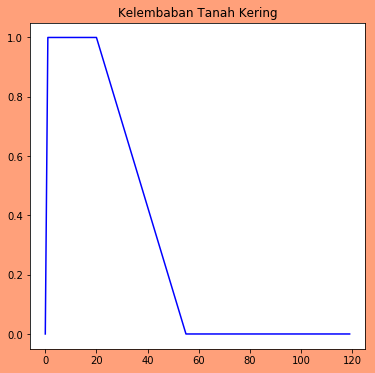

In [67]:
Kelembaban_Kering = fuzz.trapmf(Kelembaban1,[1,1,20,55])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='lightsalmon')
ax0.plot(Kelembaban1,Kelembaban_Kering,'blue')
ax0.set_title('Kelembaban Tanah Kering')

Text(0.5,1,'Kelembaban Tanah Lembab')

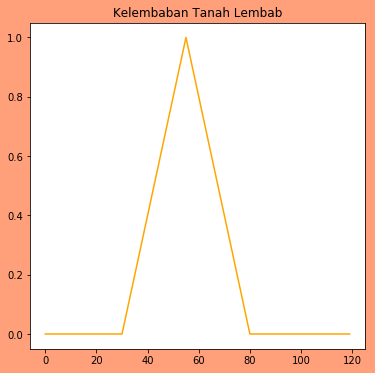

In [46]:
Kelembaban_Lembab = fuzz.trimf(Kelembaban1,[30,55,80])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='lightsalmon')
ax0.plot(Kelembaban1,Kelembaban_Lembab,'orange')
ax0.set_title('Kelembaban Tanah Lembab')

Text(0.5,1,'Kelembaban Tanah Basah')

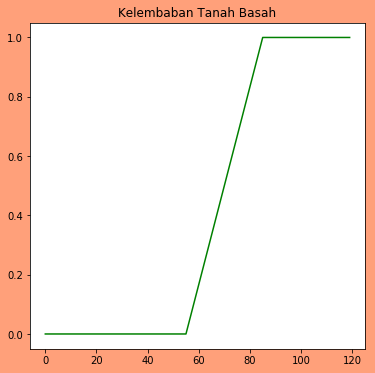

In [68]:
Kelembaban_Basah = fuzz.trapmf(Kelembaban1,[55,85,120,120])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='lightsalmon')
ax0.plot(Kelembaban1,Kelembaban_Basah,'green')
ax0.set_title('Kelembaban Tanah Basah')


- # Fuzzifikasi Cahaya

Untuk intensitas cahaya, fungsi keanggotaan terbagi menjadi 3 bagian, yaitu:
$$ Gelap = 1 - 40 Lux $$
$$ Redup = 30 - 80 Lux $$
$$ Terang = 55 - 120 Lux $$


Fungsi keanggotaan intensitas cahaya

$ \mu Gelap [x] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 55 \\
       {55-x \over 55-20} & \mbox{; } 20 < x < 55 \\
       1 & \mbox{; } 1 \leq x \leq 20
    \end{array}
\right.$



$ \mu Redup [x] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 30 \\
       {80-x \over 80-55} & \mbox{; } 55 < x ≤ 80 \\
       0 & \mbox{; } x > 80
    \end{array}
\right.$


$ \mu Terang [x] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 55 \\
       {x-55 \over 85-55} & \mbox{; } 55 < x < 85 \\
       1 & \mbox{; } 85 \leq x \leq 120
    \end{array}
\right.$


- # Membership Function Variabel Cahaya

In [71]:
Cahaya['Gelap'] = fuzz.trapmf(Cahaya.universe,(1,1,20,55)) #membership function gelap dalam bentuk trapesium dengan nilai 0 sampai 60
Cahaya['Redup'] = fuzz.trimf(Cahaya.universe,(30,55,80)) #membership function redup dalam bentuk trapesium dengan nilai 41 sampai 100
Cahaya['Terang'] = fuzz.trapmf(Cahaya.universe,(55,85,120,120)) #membership function terang dalam bentuk trapesium dengan nilai 80 sampai 115

Text(0.5,1,'Intensitas Cahaya Gelap')

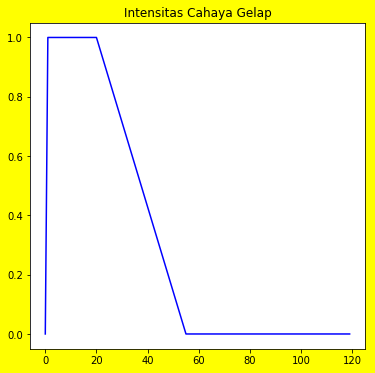

In [72]:
Cahaya_Gelap = fuzz.trapmf(Cahaya1,[1,1,20,55])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6), facecolor='yellow')
ax0.plot(Cahaya1,Cahaya_Gelap,'blue')
ax0.set_title('Intensitas Cahaya Gelap')

Text(0.5,1,'Intensitas Cahaya Redup')

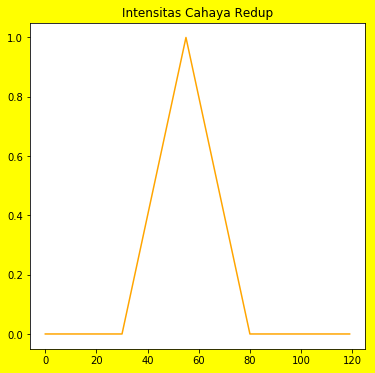

In [50]:
Cahaya_Redup = fuzz.trimf(Cahaya1,[30,55,80])
fig2, (ax1) = plt.subplots(nrows=1,figsize=(6,6), facecolor='yellow')
ax1.plot(Cahaya1,Cahaya_Redup,'orange')
ax1.set_title('Intensitas Cahaya Redup')

Text(0.5,1,'Intensitas Cahaya Terang')

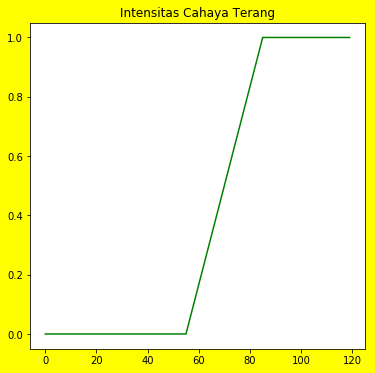

In [73]:
Cahaya_Terang = fuzz.trapmf(Cahaya1,[55,85,120,120])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(6,6), facecolor='yellow')
ax2.plot(Cahaya1,Cahaya_Terang,'green')
ax2.set_title('Intensitas Cahaya Terang')

- # Fuzzifikasi Pompa

Untuk aktuator pompa, fungsi keanggotaan terbagi menjadi 2 bagian, yaitu:
$$ OFF = 1 - 5 $$
$$ ON = 3 - 7 $$

Fungsi keanggotaan aktuator pompa


1. $ \mu OFF[x] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \ < 1 \ atau \ x \geq 5\\
       {x-1 \over 3-1} & \mbox{; } 1 < x \leq 3 \\
       {5 - x \over 5 - 3} & \mbox{; } 3 < x < 5 \\
    \end{array}
\right.$



2. $ \mu ON[x] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \ < 3 \ atau \ x \geq 7\\
       {x-3 \over 5-3} & \mbox{; } 3 < x \leq 5 \\
       {7 - x \over 7 - 5} & \mbox{; } 5 < x < 7 \\
    \end{array}
\right.$

In [52]:
Pompa['OFF'] = fuzz.trimf(Pompa.universe,(1,3,5))
Pompa['ON'] = fuzz.trimf(Pompa.universe,(3,5,7))

Text(0.5,1,'Aktuator Pompa OFF')

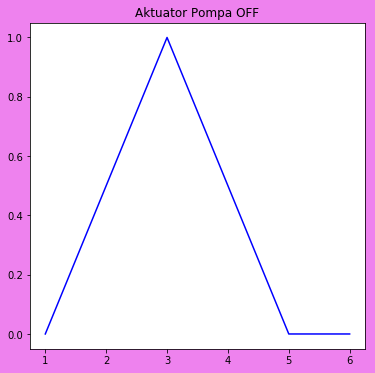

In [53]:
Pompa_OFF = fuzz.trimf(Pompa1,[1,3,5])
fig,(ax0) = plt.subplots(nrows=1, figsize=(6,6), facecolor='violet')
ax0.plot(Pompa1,Pompa_OFF,'blue')
ax0.set_title('Aktuator Pompa OFF')

Text(0.5,1,'Aktuator Pompa ON')

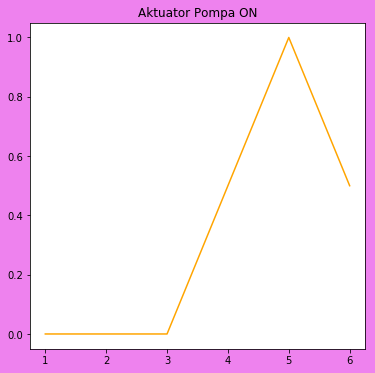

In [54]:
Pompa_ON = fuzz.trimf(Pompa1,[3,5,7])
fig2,(ax1) = plt.subplots(nrows=1, figsize=(6,6), facecolor='violet')
ax1.plot(Pompa1,Pompa_ON,'orange')
ax1.set_title('Aktuator Pompa ON')

- # Menampilkan grafik Fungsi Keanggotaan

C:\ProgramData\Anaconda3\New folder\anaconda3_64\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


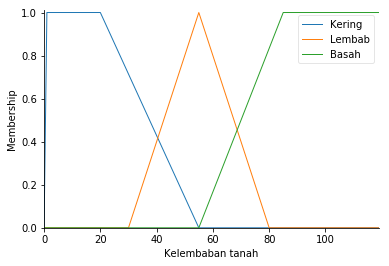

In [74]:
Kelembaban.view()

C:\ProgramData\Anaconda3\New folder\anaconda3_64\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


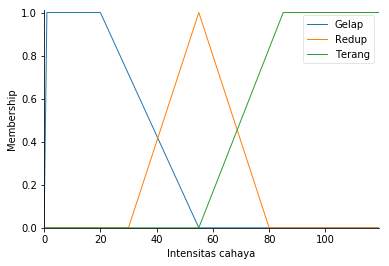

In [75]:
Cahaya.view()

C:\ProgramData\Anaconda3\New folder\anaconda3_64\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


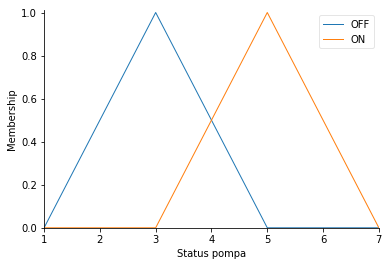

In [76]:
Pompa.view()

# 2. Operasi Fuzzy dan Implikasi (Rule base)

    Menghubungkan antesenden dengan konektor AND, OR, dan NOT. Dalam tahap ini akan dibuat beberapa aturan logika yang sesuai dengan sistem kontrol yang dibuat. Aturan logika (rulebase) yang dibangun untuk pemantauan tanaman ialah sebanyak 9 rule yang didapat dari 3 input kelembaban x 3 input cahaya

| No | Kelembaban Tanah |  Intensitas  Cahaya |    Pompa    |
|----|------------------|---------------------|-------------|
| 1  |       Kering     |         Gelap       |      ON     |
| 2  |       Kering     |         Redup       |      ON     |
| 3  |       Kering     |         Terang      |      ON     |
| 4  |       Lembab     |         Gelap       |      ON     |
| 5  |       Lembab     |         Redup       |      ON     |
| 6  |       Lembab     |         Terang      |      ON     |
| 7  |       Basah      |         Gelap       |      OFF    |
| 8  |       Basah      |         Redup       |      OFF    |
| 9  |       Basah      |         Terang      |      ON     |

1. IF (kelembaban = kering) AND (cahaya = gelap) THEN (pompa = ON)
2. IF (kelembaban = kering) AND (cahaya = redup) THEN (pompa = ON)
3. IF (kelembaban = kering) AND (cahaya = terang) THEN (pompa = ON)
4. IF (kelembaban = lembab) AND (cahaya = gelap) THEN (pompa = ON)
5. IF (kelembaban = lembab) AND (cahaya = redup) THEN (pompa = ON)
6. IF (kelembaban = lembab) AND (cahaya = terang) THEN (pompa = ON)
7. IF (kelembaban = basah) AND (cahaya = gelap) THEN (pompa = OFF)
8. IF (kelembaban = basah) AND (cahaya = redup) THEN (pompa = OFF)
9. IF (kelembaban = basah) AND (cahaya = terang) THEN (pompa = ON)

# NOTE!!!

    Berdasarkan aturan logika diatas, aktuator tidak akan aktif jika kelembaban tanah dalam kondisi basah dengan intensitas cahaya redup atau gelap. Derajat keanggotaan ditentukan dengan menggunakan fungsi MIN yaitu nilai derajat keanggotaan terkecil dari variabel linguistik pada satu aturan fuzzy.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15979810358>)

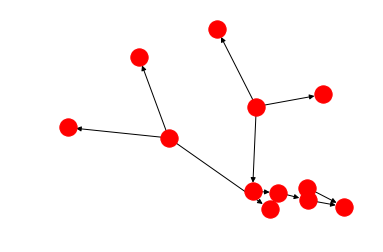

In [77]:
rule1 = ctrl.Rule(Kelembaban['Kering'] & Cahaya['Gelap'], Pompa['ON'])
rule2 = ctrl.Rule(Kelembaban['Kering'] & Cahaya['Redup'], Pompa['ON'])
rule3 = ctrl.Rule(Kelembaban['Kering'] & Cahaya['Terang'], Pompa['ON'])

rule4 = ctrl.Rule(Kelembaban['Lembab'] & Cahaya['Gelap'], Pompa['ON'])
rule5 = ctrl.Rule(Kelembaban['Lembab'] & Cahaya['Redup'], Pompa['ON'])
rule6 = ctrl.Rule(Kelembaban['Lembab'] & Cahaya['Terang'], Pompa['ON'])

rule7 = ctrl.Rule(Kelembaban['Basah'] & Cahaya['Gelap'], Pompa['OFF'])
rule8 = ctrl.Rule(Kelembaban['Basah'] & Cahaya['Redup'], Pompa['OFF'])
rule9 = ctrl.Rule(Kelembaban['Basah'] & Cahaya['Terang'], Pompa['ON'])

rule1.view() #mencetak gambar aturan

# 3. Fuzzy Interface

In [78]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

- # Menggunakan mode simulasi

In [79]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# 4. Defuzzifikasi

- Defuzzifikasi merupakan pengubahan output fuzzy yang diperoleh dari mesin inferensi menjadi nilai tegas menggunakan fungsi keanggotaan yang sesuai saat dilakukannya fuzzifikasi.

- # Contoh Kasus

bagaimana status pompa jika Kelembaban Tanah bernilai 70 dan Intensitas Cahaya bernilai 55?

# Kelembaban Tanah = 70

- Lembab [70] = (80 - 70) / (80 - 55) <br>
<font color=green>Lembab [70] = 0.4</font>


$ \mu Lembab[70] =
\left\{
    \begin{array}{ll}
       {80-70 \over 80-55} = 0.4 \\
    \end{array}
\right.$

- Basah [70] = (70 - 55) / (120 - 55) <br>
<font color=green>Lembab [70] = 0.2</font>


$ \mu Basah[70] =
\left\{
    \begin{array}{ll}
       {70-55 \over 120-55} = 0.2 \\
    \end{array}
\right.$


# Intensitas Cahaya = 55

- Intensitas cahaya [55] = (80 - 55) / (80 - 50) <br>
<font color=green>Intensitas cahaya [55] = 1</font>

$ \mu Redup[55] =
\left\{
    \begin{array}{ll}
       {80-55 \over 80-50} = 1 \\
    \end{array}
\right.$

In [97]:
tipping.input['Kelembaban tanah'] = 70
tipping.input['Intensitas cahaya'] = 55

tipping.compute()

In [98]:
print(tipping.output['Status pompa'])

3.912820512820513


C:\ProgramData\Anaconda3\New folder\anaconda3_64\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


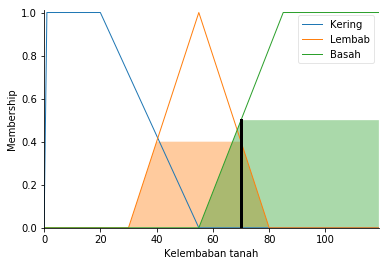

In [99]:
Kelembaban.view(sim=tipping)

C:\ProgramData\Anaconda3\New folder\anaconda3_64\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


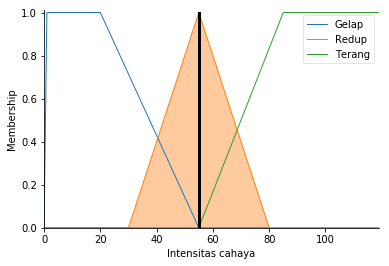

In [100]:
Cahaya.view(sim=tipping)

C:\ProgramData\Anaconda3\New folder\anaconda3_64\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


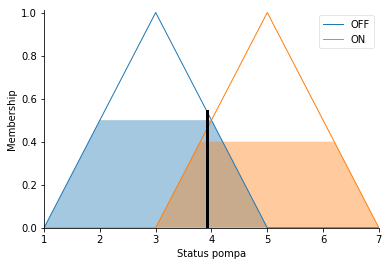

In [101]:
Pompa.view(sim=tipping)

# Evaluasi rule

- [R6] If Kelembaban is _Lembab_ and Cahaya is _Terang_ then Pompa is ON

$$
Rule 6	= KelembabanLembab \cap CahayaTerang\\
   min  = ( KelembabanLembab [70], CahayaTerang [55])\\
   min  = ( 0.4; 1 )\\
   min  =	0.4
$$

- [R9] If Kelembaban is _Basah_ and Cahaya is _Terang_ then Pompa is ON

$$
Rule 9	= KelembabanBasah \cap CahayaTerang\\
    min = ( KelembabanBasah [70], CahayaTerang [55])\\
    min = ( 0.2;1)\\
    min =	0.2
$$

- # Aggregasi

Mengambil nilai Min = (Min(1, 0.5)) = 0.5

#### Dalam menentukan hasil akhir yaitu menggunkan metode COG (Centre Of Gravity)

$COG =
\left\{
    \begin{array}{ll}
       {( (0)x0.4 + (0.5+1.0+1.5)x0.6 + (2.0+2.5+3)x0.2 ) \over (0.4+0.6+0.6+0.6+0.2+0.2+0.2)} = 1.78 \\
    \end{array}
\right.$